<center><img src="img/Marca-ITBA-Color-ALTA.png" width="250">

<h1>Master en Management & Analytics</h1>
</center>


## Clase 6 - Evaluación de modelos de Clasificación

#### Referencias y bibliografía de consulta:

- Introduction to Machine Learning with Python by Andreas C. Müller and Sarah Guido (O’Reilly) 2017 
- An Introduction to Statistical Learning with Applications in R by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani (Springer) 2017 
- Python Machine Learning - Second Edition by Sebastian Raschka (Packt) 2017 
- Hands-On Machine Learning with Scikit-Learn and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems - Aurélien Géron
- https://scikit-learn.org/

In [1]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.colors import ListedColormap
%matplotlib inline

import seaborn as sns
sns.set(style = 'white')

## Churn de una empresa de telecomunicaciones


En esta clase vamos a seguir trabajando con el [dataset de churn de una empresa de telecomunicaciones ficticia](https://www.kaggle.com/blastchar/telco-customer-churn). 

Repasemos en qué consiste el problema. Cada fila representa un cliente, cada columna contiene los atributos del cliente.

El conjunto de datos incluye información sobre

- Clientes que se han dado de baja en el último mes - la columna se llama Churn.
- Servicios que cada cliente ha contratado: teléfono, líneas múltiples, Internet, seguridad en línea, copia de seguridad en línea, protección de dispositivos, soporte técnico y transmisión de TV y películas.
- Información de la cuenta del cliente: cuánto tiempo ha sido cliente, contrato, método de pago, facturación sin papel, cargos mensuales y cargos totales.
- Información demográfica sobre los clientes: sexo, rango de edad y si tienen pareja y personas a su cargo.

Más en detalle, las columnas son las siguientes:

* **customerID** : ID del cliente
* **gender**: Si el cliente es un hombre o una mujer
* **SeniorCitizen** : Si el cliente es una persona mayor o no (1, 0)
* **Partner** : Si el cliente tiene pareja o no (Yes, No)
* **Dependents** : Si el cliente tiene dependientes o no  (Yes, No)
* **tenure** : Número de meses que el cliente ha permanecido en la empresa
* **PhoneService** : Si el cliente tiene servicio telefónico o no (Yes, No)
* **MultipleLines** : Si el cliente tiene varias líneas o no (Yes, No, No phone service)
* **InternetService** : El proveedor de servicios de Internet del cliente (DSL, Fiber optic, No)
* **OnlineSecurity** : Si el cliente tiene seguridad en línea o no (Yes, No, No internet service)
* **OnlineBackup** : Si el cliente tiene copia de seguridad en línea o no (Yes, No, No internet service)
* **DeviceProtection** : Si el cliente tiene protección de dispositivos o no (Yes, No, No internet service)
* **TechSupport** : Si el cliente tiene soporte técnico o no (Yes, No, No internet service)
* **StreamingTV** : Si el cliente tiene o no televisión en streaming (Yes, No, No internet service)
* **StreamingMovies** : Si el cliente tiene películas en streaming o no (Yes, No, No internet service)
* **Contract** : La duración del contrato del cliente (Month-to-month, One year, Two year)
* **PaperlessBilling** : Si el cliente tiene facturación sin papel o no (Yes, No)
* **PaymentMethod** : El método de pago del cliente (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* **MonthlyCharges** : El importe cargado al cliente mensualmente
* **TotalCharges** : El importe total cobrado al cliente
* **Churn** : Si el cliente ha dejado la compañía (Yes or No)

Nuestra variable target es **Churn**.



### 1) Carga de los datos y primera inspección del dataset

Comencemos, como de costumbre, importando el dataset.

In [2]:
dataset = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Veamos la cantidad de filas y de columnas que tiene el dataset:

In [3]:
print('El dataset tiene {} filas y {} columnas'.format(dataset.shape[0],dataset.shape[1]))

El dataset tiene 7043 filas y 21 columnas


### 2) Limpieza y preprocesamiento de datos

Como ya realizamos una análisis exploratorio (EDA) en la clase anterior, en esta clase vamos pasar directamente a la limpieza y preprocesamiento de los datos. 

Nota: hay que señalar que en realidad no es necesario realizar cada vez todo el proceso de preprocesamiento. Podríamos perfectamente salvar los DataFrames limpios en un csv e importar directamente ese archivo. En esta clase vamos a repetir los pasos como repaso.

Recordamos que no tenemos valores nulos y que tenemos que convertir la columna `TotalCharges` a un dtype numérico, porque esta casteado como string. 

In [4]:
dataset['TotalCharges'] = dataset['TotalCharges'].replace(" ", 0).astype('float64')

Eliminamos la columna `customerID`:

In [5]:
dataset.drop('customerID', axis=1, inplace=True)

Creamos las variables dummy:

In [6]:
df_dummies = pd.get_dummies(dataset, drop_first=True)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


Corroboramos cuáles son las features del DataFrame y el tipo de datos:

In [7]:
df_dummies.dtypes

SeniorCitizen                              int64
tenure                                     int64
MonthlyCharges                           float64
TotalCharges                             float64
gender_Male                                uint8
Partner_Yes                                uint8
Dependents_Yes                             uint8
PhoneService_Yes                           uint8
MultipleLines_No phone service             uint8
MultipleLines_Yes                          uint8
InternetService_Fiber optic                uint8
InternetService_No                         uint8
OnlineSecurity_No internet service         uint8
OnlineSecurity_Yes                         uint8
OnlineBackup_No internet service           uint8
OnlineBackup_Yes                           uint8
DeviceProtection_No internet service       uint8
DeviceProtection_Yes                       uint8
TechSupport_No internet service            uint8
TechSupport_Yes                            uint8
StreamingTV_No inter

Creamos nuestra matriz de *features* y nuestro vector *target*:

In [8]:
y = df_dummies['Churn_Yes']
X = df_dummies.drop(columns = ['Churn_Yes'])

In [9]:
# Verificamos los shapes y los tipos de X e y:
print("Shape X:", X.shape)
print("Type X:", type(X))
print("Shape y:", y.shape)
print("Type y:", type(y))

Shape X: (7043, 30)
Type X: <class 'pandas.core.frame.DataFrame'>
Shape y: (7043,)
Type y: <class 'pandas.core.series.Series'>


Hacemos el split entre train y test sets.

In [10]:
from sklearn.model_selection import train_test_split

rs=15

X_train, X_test, y_train, y_test = \
                    train_test_split(X, y, stratify=y, test_size=0.25, random_state=rs)

Corroboramos los `shapes` de las matrices:

In [11]:
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (5282, 30)
y_train.shape:  (5282,)
X_test.shape:  (1761, 30)
y_test.shape:  (1761,)


Corroboramos que el set de entrenamiento y de testeo tengan el mimsmo % de observacione por clase. Esto se logra pasando el argumento `stratify=y` en `train_test_split`.

In [12]:
print('y:', y.value_counts(normalize=True).values)

print('y train:', y_train.value_counts(normalize=True).values)

print('y test:', y_test.value_counts(normalize=True).values)

y: [0.73463013 0.26536987]
y train: [0.73457024 0.26542976]
y test: [0.73480977 0.26519023]


##### Estandarización

La implementación de `Sklearn` incorpora por dafault en la función de costo un término de regularización. Por default, se implementa la penalidad *L2*, es decir la misma de la regresión Ridge. Otro punto a tener en cuenta es que en la regresión logística, el hiperparámetro $\alpha$ es reemplazado por el hiperparámetro $C$, que cumple la misma funcionalidad, pero que es el inverso de $\alpha$, es decir que a menor $C$, más regularización y valores de los parámetros más chicos.  


In [13]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index, \
                           columns= X_train.columns)

X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, \
                           columns= X_test.columns)

### 3) Clasificación con Regresión Logística

En Scikit-Learn encontramos la implementación de la regresión logística en el módulo de modelos lineales, con en la clase `LogisticRegression`. 

Importemos la clase de la regresión logistica:

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
from sklearn.model_selection import GridSearchCV

lor_reg_opt = LogisticRegression(max_iter=10000)

# Definimos el espacio de búsqueda de hiperparámetros con un diccionario:
param_grid = [{'solver': ['lbfgs', 'liblinear','newton-cg', 'sag'], 'penalty': ['l2'], 'C':[0.1, 1, 10, 20, 30]},
              {'solver': ['liblinear'], 'penalty':[ 'l1'], 'C':[0.01, 0.05, 0.075, 0.1, 1, 0.25, 0.75]}]

print(param_grid)

[{'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag'], 'penalty': ['l2'], 'C': [0.1, 1, 10, 20, 30]}, {'solver': ['liblinear'], 'penalty': ['l1'], 'C': [0.01, 0.05, 0.075, 0.1, 1, 0.25, 0.75]}]


Definimos la estrategia de validación cruzada. 

En este caso, en lugar de pasarle directamente a Gridsearch el valor de la cantidad de particiones, le vamos a pasar un objeto de la clase [StratifiedKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html) que genera sets de testeo con distribuciones de clase iguales o lo más similares posibles. 

In [16]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=12)

In [17]:
grid = GridSearchCV(lor_reg_opt, param_grid, cv=skf, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=12, shuffle=True),
             estimator=LogisticRegression(max_iter=10000), n_jobs=-1,
             param_grid=[{'C': [0.1, 1, 10, 20, 30], 'penalty': ['l2'],
                          'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag']},
                         {'C': [0.01, 0.05, 0.075, 0.1, 1, 0.25, 0.75],
                          'penalty': ['l1'], 'solver': ['liblinear']}],
             verbose=1)

In [18]:
print(grid.best_estimator_)
print(grid.best_score_)
print(grid.best_params_)

LogisticRegression(C=0.05, max_iter=10000, penalty='l1', solver='liblinear')
0.8057522361744216
{'C': 0.05, 'penalty': 'l1', 'solver': 'liblinear'}


### 4) Evaluación de modelos de clasificación


#### 4.1) Matriz de confusión

Una de las formas más completas de representar el resultado de la evaluación de la clasificación binaria es utilizando matrices de confusión. 

Una matriz de confusión es una matriz de 2x2, donde las filas corresponden a las clases verdaderas y las columnas a las clases predichas.

<img src="img/matrizconfusion.png" width="400">

<div class='epigraph' align="center"><i>         Matriz de Confusión</i></div><br>

Donde:

- **TN** = True Negative: es una clase negativa que ha sido correctamente clasificada como tal. 
- **FP** = False Positive: es una clase negativa que fue erroneamente clasificada como positiva.
- **FN** = False Negative: es una clase positiva que fue erroneamente clasificada como negativa.
- **TP** = True Positive: es una clase positiva que ha sido correctamente clasificada como tal.


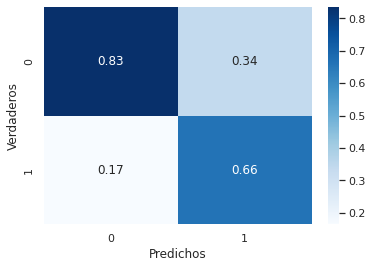

In [29]:
# Elaboramos la matriz de confusión
from sklearn.metrics import confusion_matrix

y_pred_train = grid.predict(X_train)
y_pred_test = grid.predict(X_test)

sns.heatmap(confusion_matrix(y_test, y_pred_test, normalize="pred"), annot=True, cmap="Blues")
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

In [28]:
from sklearn.metrics import recall_score, precision_score

In [27]:
recall_score(y_test, y_pred_test)

0.5032119914346895

In [30]:
precision_score(y_test, y_pred_test)

0.6619718309859155

Como podemos observar en la matriz de confunsión, a pesar de acertar en la mayoría de las observaciones, el modelo registra una importante cantidad de FN y también de FP. 

Veamos como impacta esto en las diferentes métricas de performance. 

#### 4.2) Accuracy 

El `accuracy` se calcula de la siguiente manera:


<img src="img/acc.png" width="400">

En otras palabras, el `accuracy` es el número de predicciones correctas (TP y TN) dividido por el número de todas las muestras (todas las entradas de la matriz de confusión sumadas). 

Un fenómeno que puede afectar la utilidad de el `accuracy` es la presencia de clases desbalanceadas, es decir los casos en los que una clase tiene muchas más observaciones que la otra. Muchos problemas son, de hecho, problemas con clases desbalanceadas. La detección de cáncer o la predicción de clicks en adds son ejemplos de esto. Imaginemos que tenemos un problema donde una clase representa el 99% de las observaciones y la otra el 1%. Un modelo que prediga siempre a la clase mayoritaria, obtendría un `accuracy` de 99% y sin embargo sería un modelo que no nos sirve para nada. 

También puede suceder que no nos sea indiferente qué tipo de errores cometemos. Es decir, el costo, o las consecuencias de comenter un FP o un FN, pueden no ser iguales. Imaginemos el caso de detección de cáncer. Las consecuencias de un FP será la necesidad de realizar de nuevo el test y darle un susto innecesario al paciente. Ciertamente no es algo bueno, pero es infinitamente menos grave que un FN donde no detectamos un positivo y perdemos la oportunidad de comenzar un tratamiento a tiempo. En este caso vamos a querer minimizar los FN, tal vez aceptando una mayor cantidad de FP. 

Calculemos el accuracy del modelo: 

In [31]:
from sklearn.metrics import accuracy_score

print ('Accuracy train set:', accuracy_score(y_train,y_pred_train).round(4))
print ('Accuracy test set:', accuracy_score(y_test,y_pred_test).round(4))

Accuracy train set: 0.8063
Accuracy test set: 0.8001


Recordemos cuál es la distribución de las clases:

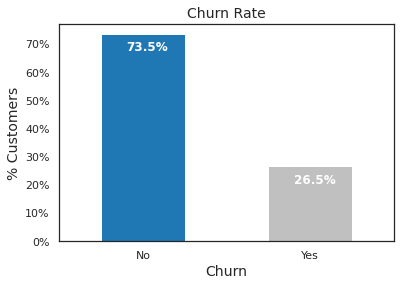

In [32]:
colors = ['#1f77b4','#C0C0C0']
ax = (dataset['Churn'].value_counts()*100.0 /len(dataset)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (6,4))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

# creamos una lista para recolectar los datos del plt.patches
totals = []

# encontramos los valores y los appendeamos a la lista
for i in ax.patches:
    totals.append(i.get_width())

# creamos etiquetas para cada barra
total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x()+.15, i.get_height()-6.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
            weight = 'bold',)

Tenemos un accuracy de casi el 80% en el set de testeo. Este hecho debe sin embargo relativizarse dado que tenemos clases desbalanceadas. 

Dado que tenemos clases desbalanceadas, el accuracy no es una métrica confiable. Para eso entonces, vamos a ver a continuación otras métricas que nos van a informar mejor de cómo está funcionando este modelo.

#### 4.3)  Precision

El `precision` se calcula de la siguiente manera:


<img src="img/prec.png" width="300">

El `precision` se utiliza como una medida de rendimiento cuando el objetivo es limitar el número de falsos positivos.

In [33]:
from sklearn.metrics import precision_score

print ('Precision train set:', precision_score(y_train,y_pred_train).round(4))
print ('Precision test set:', precision_score(y_test,y_pred_test).round(4))

Precision train set: 0.6632
Precision test set: 0.662


Esto quiere decir que, del total de clientes que el modelo predice que dejarán la compañía, un 65,83% de ellos realmente lo hace.

#### 4.4)  Recall

El `recall` se calcula de la siguiente manera:


<img src="img/recall.png" width="280">

El `recall` se utiliza como una medida de rendimiento cuando el objetivo es limitar el número de falsos negativos.


In [34]:
from sklearn.metrics import recall_score

print ('Recall train set:', recall_score(y_train,y_pred_train).round(4))
print ('Recall test set:', recall_score(y_test,y_pred_test).round(4))

Recall train set: 0.5492
Recall test set: 0.5032


Esto quiere decir que del total de clientes que dejan la compañía, solamente la mitad es detectada por nuestro modelo.

#### 3.4) F1-score

El `F1-score` es la media armónica entre `precision` y `recall`:


<img src="img/f1.png" width="350">


La ventaja de usar la media armónica, en lugar de la media aritmética), es que para tener un `f1-score` alto, es necesario que tanto el `recall` como la `precision` sean altas, mientras que un `f1-score` bajo puede ser el resultado de un valor bajo en por lo menos una de estas métricas o en ambas a la vez:

Es un promedio armónico entre precision y recall.
<img src="img/f1_2.png" width="500">


In [35]:
from sklearn.metrics import f1_score

print ('F1-score train set:', f1_score(y_train,y_pred_train).round(4))
print ('F1-score test set:', f1_score(y_test,y_pred_test).round(4))

F1-score train set: 0.6009
F1-score test set: 0.5718


El módulo `sklearn.metrics`de `Sklearn` tiene implementada una función con un reporte de clasificación. Apliquémoslo a nuestra regresión logística:

In [36]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1294
           1       0.66      0.50      0.57       467

    accuracy                           0.80      1761
   macro avg       0.75      0.71      0.72      1761
weighted avg       0.79      0.80      0.79      1761



### 5) Umbrales de decisión

Cuando presentamos a las diferentes métricas, mencionamos que para algunos modelos, podía ser mucho más grave cometer un FN que un FP. Recordemos el caso de test médicos. En ese caso, tal vez estemos dispuestos a aceptar un mayor % de FP con el fin de reducir los  FN. 

¿Qué podemos hacer para modificar la forma en la que el modelo realiza su predicción?

Cuando aplicamos el método `predict()`, `sklearn` realiza la predicción de la clase de $y$ eligiendo para cada clase la mayor probabilidad de este array. Es decir, el umbral que usa el modelo para definir si la observación pertenece o no a la clase 1 es 50%. 

Para modificar la forma en la que el modelo realiza la predicción, tenemos que modificar el umbral o `threshold` que el modelo utiliza para realizar la clasificación. 

Con el método `predict_proba()` obtenemos la probabilidad de ocurrencia que el modelo asigna a cada clase. 

Observemos los resultados para la regresión logística.

In [37]:
grid.predict_proba(X_test)[:5]

array([[0.80660419, 0.19339581],
       [0.70296292, 0.29703708],
       [0.87483725, 0.12516275],
       [0.89428807, 0.10571193],
       [0.99045689, 0.00954311]])

Vemos que el método `predict_proba()` nos devuelve una array en el cual aparecen dos probabilidades de cada instancia del test set: $P(y=0)$ y $P(y=1)$.

Calculamos las probabilidades:

In [38]:
y_proba_train = grid.predict_proba(X_train)
y_proba_test = grid.predict_proba(X_test) 

Veamos cómo están distribuidas las probabilidades calculadas para la $y=1$:

/home/ari/miniconda3/envs/itba/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


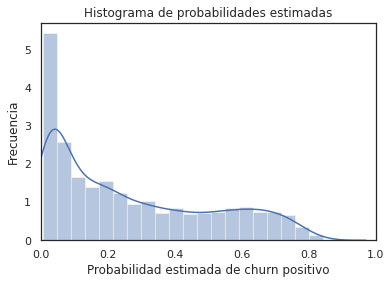

In [39]:
sns.distplot(y_proba_train[:,1], bins=20)

plt.xlim(0,1)
plt.title('Histograma de probabilidades estimadas')
plt.xlabel('Probabilidad estimada de churn positivo')
plt.ylabel('Frecuencia')
plt.show()

Si queremos tener menos FN, vamos a tener que bajar el umbral, es decir que el modelo prediga $y=1$ desde una $P(y=1)$ menor, que sea más sensible.  

Definamos un nuevo umbral y generemos un nuevo array de predicciones:

In [40]:
# Definimos un umbral de 35%:
thr = 0.35

y_train_pred_thr = (y_proba_train[:,1] > thr).astype(int)
y_test_pred_thr = (y_proba_test[:,1] > thr).astype(int)

In [41]:
y_train_pred_thr

array([0, 0, 1, ..., 0, 0, 0])

In [42]:
print(classification_report(y_test, y_test_pred_thr))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84      1294
           1       0.56      0.69      0.62       467

    accuracy                           0.77      1761
   macro avg       0.72      0.75      0.73      1761
weighted avg       0.79      0.77      0.78      1761



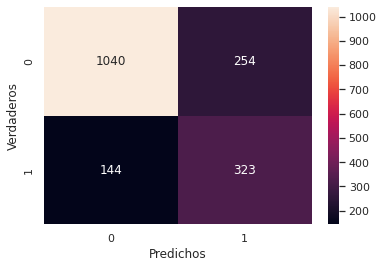

In [43]:
sns.heatmap(confusion_matrix(y_test, y_test_pred_thr), annot=True, fmt='.0f')
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

Vemos que los FN bajaron de 232 a 144 que puede apreciarse en la mejoría en el `recall`. Vemos también que esa mejora no fue gratuita, ya que tanto el `precision` como el `accuracy` bajaron.

### Curva precision-recall

In [44]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train, y_proba_train[:,1])

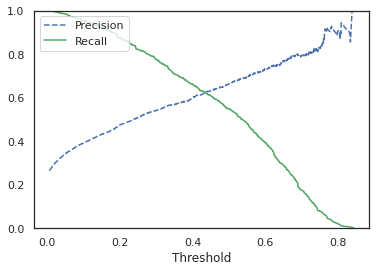

In [45]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

¿Por qué se ve que la curva de precision hacia el final presenta oscilaciones mientras que la curva de recall es más suave?

Recordemos las fórmulas:

<img src="img/prec.png" width="300">

<img src="img/recall.png" width="280">

Podemos ver que al subir el umbral, la `Precision` tenderá a mejorar por la baja de `FP`, pero también puede pasar que un `TP` se transforme en un `FN`. Por otro lado, en el caso `Recall`, al subir el umbral, los `FN` pueden solamente aumentar.

Podemos usar esta información para obtener el umbral que maximiza el f1-score:

In [46]:
def media_armonica(arr1, arr2):
    return 2*(arr1*arr2)/(arr1+arr2)

In [47]:
f1_scores = media_armonica(precisions, recalls)

In [48]:
f1_scores.max()

0.6422764227642276

In [52]:
f1_scores.argmax()

2570

In [53]:
thresholds[2570]

0.29464312084276206

In [55]:
dicc_f1_th = dict(zip(thresholds, f1_scores[:-1]))

In [56]:
max(dicc_f1_th, key=dicc_f1_th.get)

0.29464312084276206

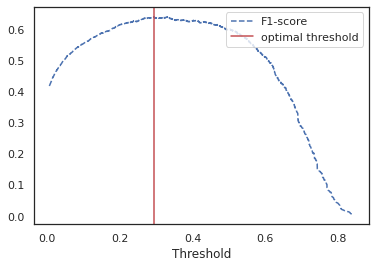

In [57]:
plt.plot(thresholds, f1_scores[:-1], "b--", label="F1-score")
plt.axvline(x=max(dicc_f1_th, key=dicc_f1_th.get), color='r', label='optimal threshold')
plt.xlabel("Threshold")
plt.legend(loc="upper right");

In [60]:
thr

0.29464312084276206

In [58]:
thr = max(dicc_f1_th, key=dicc_f1_th.get)

y_train_pred_thr = (y_proba_train[:,1] > thr).astype(int)
y_test_pred_thr = (y_proba_test[:,1] > thr).astype(int)

In [59]:
print(classification_report(y_train, y_train_pred_thr))

              precision    recall  f1-score   support

           0       0.91      0.76      0.83      3880
           1       0.54      0.79      0.64      1402

    accuracy                           0.77      5282
   macro avg       0.72      0.77      0.73      5282
weighted avg       0.81      0.77      0.78      5282



In [61]:
print(classification_report(y_test, y_test_pred_thr))

              precision    recall  f1-score   support

           0       0.90      0.76      0.82      1294
           1       0.53      0.76      0.63       467

    accuracy                           0.76      1761
   macro avg       0.71      0.76      0.72      1761
weighted avg       0.80      0.76      0.77      1761



### 6) Curva ROC y AUC

Recordemos que la `curva ROC` nos permite evaluar la performance de un modelo para distintos `umbrales de decisión`, pudiendo evaluar el trade-off entre `precision` y `recall`.

Vamos a aplicar la implementación de sklearn de la curva ROC y del AUC.

In [62]:
from sklearn.metrics import roc_curve, auc

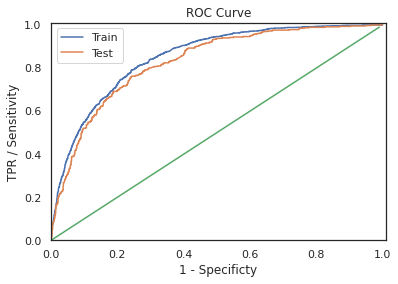

In [63]:
fpr_train, tpr_train, thr_train = roc_curve(y_train, y_proba_train[:,1])
fpr_test,tpr_test,thr_test = roc_curve(y_test, y_proba_test[:,1])

plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(fpr_train,tpr_train)
plt.plot(fpr_test,tpr_test)
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.legend(['Train','Test'])
plt.show() 

In [64]:
print('AUC Train=', auc(fpr_train,tpr_train))
print('AUC Test=', auc(fpr_test,tpr_test))

AUC Train= 0.8511135601570657
AUC Test= 0.828939529834618


Podemos usar la curva ROC también para comparar modelos. Traigamos el modelo KNN que entrenamos en la clase de introducción a modelos de clasificación:

In [69]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', p=1)

knn.fit(X_train, y_train)

y_pred_train_knn = knn.predict(X_train)
print ('Accuracy KNN Train:', accuracy_score(y_train,y_pred_train_knn).round(4))

y_pred_test_knn = knn.predict(X_test)
print ('Accuracy KNN Train:', accuracy_score(y_test,y_pred_test_knn).round(4))

Accuracy KNN Train: 0.8381
Accuracy KNN Train: 0.7615


Calculamos las probabilidades de KNN en el test set:

In [70]:
y_proba_test_knn = knn.predict_proba(X_test)

Graficamos la curva ROC y calculamos el AUC en el set de testeo para la regresión logística y KNN:

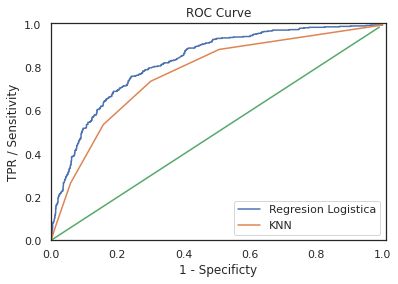

In [71]:
fpr_log,tpr_log,thr_log = roc_curve(y_test, y_proba_test[:,1])
fpr_knn,tpr_knn,thr_knn = roc_curve(y_test, y_proba_test_knn[:,1])

plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(fpr_log,tpr_log)
plt.plot(fpr_knn,tpr_knn)
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.legend(['Regresion Logistica','KNN'])
plt.show() 

In [72]:
print('AUC Regresion Logistica =', auc(fpr_log,tpr_log).round(4))
print('AUC KNN =', auc(fpr_knn,tpr_knn).round(4))

AUC Regresion Logistica = 0.8289
AUC KNN = 0.7716


Observamos que ambos modelos tienen una performance muy parecida. 


### ¡Muchas gracias por la atención!